# Pokemon World Cup

In [1]:
import random
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

class WorldCup:
    filenamelist=os.listdir('.\\data')
    c1=-1  #승자
    c2=[]  #2강
    c4=[]  #4강
    c8=[]  #8강
    c16=[] #16강
    c32=[] #32강
    c64=[] #64강
    c128=[]#128강
    c0=[]  #처음에 사용자가 입력한 round에 따른 초기화 값을 저정함.
    cm_db=[]#포멧몬 데이터 베이스 
    c_cup={1:c1, 2:c2, 4:c4, 8:c8, 16:c16, 32:c32, 64:c64, 128:c128}
    fname=[]#파일이름
    z={1:128,2:64,3:32,4:16,5:8,6:4,7:2}
  
    ### 그림 파일 이름을 받아와서 랜덤하게 섞이.
    def db_setting(self): 
        for filenames in self.filenamelist:
            self.fname.append(filenames)
            random.shuffle(self.fname)
    
    ### 변수 값을 초기화하기
    def value_setting(self):
        self.c1=-1
        self.c2.clear()
        self.c4.clear()
        self.c8.clear()
        self.c16.clear()
        self.c32.clear()
        self.c64.clear()
        self.c128.clear()
        self.c0.clear()
        self.cm_db.clear()
        self.fname.clear()
        self.c_cup={1:self.c1, 2:self.c2, 4:self.c4, 8:self.c8, 16:self.c16, 32:self.c32, 64:self.c64, 128:self.c128}
    
    ### 게임을 수행하는 부분. 
    def select_items(self,round): #round로 올 수 있는 값 : 128/64/32/16/8/4/2
        if round == 2: 
            print("\n=================[결승전 시작]=================")
        else :
            print("=================================================")
            print("\n===================[{}강 시작]===================".format(round))
            print("=================================================")
            random.shuffle(self.c_cup[round]) # 현재 round 시작 전에 리스트의 값을 랜덤하게 섞어준다.
        get_name=lambda x:x.split('.')[0]     # 파일명만 가져오도록 하는 간단한 함수.
        
        for i in range(0, round, 2):
            print("\n{}강 {}/{}: {}. {} vs {}. {}".
                  format(round,                                          # 몇 강
                         int((i+2)/2),int(round/2),                      # 대결의 몇번 째/전체 대결 수
                         i+1,get_name(self.fname[self.c_cup[round][i]]), # 선택할 숫자1. 포켓몬이름
                         i+2,get_name(self.fname[self.c_cup[round][i+1]])# 선택할 숫자2. 포켓몬이름
                        )
                 )
            ### 사진 보여주는 코드 ### 
            ### 첫번 째 사진
            fig=figure()
            pokemon1='.\\data\\'+self.fname[self.c_cup[round][i]]
            a=fig.add_subplot(1,2,1)
            image=imread(pokemon1)
            imshow(image)
            axis('off')
            ### 두번 째 사진
            pokemon2='.\\data\\'+self.fname[self.c_cup[round][i+1]]
            a=fig.add_subplot(1,2,2)
            image=imread(pokemon2)
            imshow(image)
            axis('off')
            plt.show()

            ### 사용자들한테 입력받기 ###
            while True :
                left_number= i+1
                right_number= i+2
                user_selected_number=int(input("- 번호를 입력해 주세요: "))
                if user_selected_number==left_number or user_selected_number==right_number: break # 올바른숫자를 입력하면 while문을 나감.
                else: print("숫자를 잘못 입력했습니다. 다시입력해 주세요.")
            if user_selected_number==left_number : original_db_number=self.c_cup[round][i] # 사용자가 왼쪽 사진을 선택
            else : original_db_number=self.c_cup[round][i+1] #사용자가 오른쪽 사진을 선택

            if round==2 : # 결승전일 때
                self.c_cup[int(round/2)]=original_db_number # int(round/2) = 1
                print("\n================★[최종 결과]★================")
                print("1위: ", get_name(self.fname[self.c_cup[int(round/2)]]))
                ### 최종 사진 ###
                fig=figure()
                image=imread('.\\data\\'+self.fname[self.c_cup[int(round/2)]])
                imshow(image)
                axis('off')
                plt.show()
                print("================================================")
            else : # 결승전이 아닌 일반적인 경우일 때
                self.c_cup[int(round/2)].append(original_db_number) # 현재 round에서 선택한 결과를 다음 round의 리스트에 추가(append)한다.
        if round!=2 :        
            round=int(round/2)
            self.select_items(round)
    
    def round_setting(self): #round수 선택 받고, 초기화하기
        round_num=0
        self.value_setting() # 변수들 초기화
        self.db_setting()    # 포켓몬db 초기화하기
    
        ### round setting ###
        while True: # Round 선택받기 128/64/32/16/8/4/2     
            print("\n================[ 포켓몬 월드컵 ]===============")
            print("================================================")
            
            round_num=int(input("========= 몇 강으로 할지 선택해 주세요.=========\n- 1. 128강\n- 2. 64강\n- 3. 32강\n- 4. 16강\n- 5. 8강\n- 6. 4강\n- 7. 2강\n(숫자 입력하기) > "))
        
            if round_num in self.z.keys() : break
            else : print("\n======[error]======\n없는 숫자입니다. 다시 입력해 주세요.\n")
        # 선택값으로 초기화하기
        rounds=self.z[round_num]
        for round in range(rounds):
            self.c0.append(round)
        self.c_cup[rounds]=self.c0 # 초기화한 값
        ### rounds 입력값에 따른 select_items 매서드 시작 ###
        self.select_items(rounds)

    def start_game(self):
        self.round_setting()


================[ 포켓몬 월드컵 ]===============
========= 몇 강으로 할지 선택해 주세요.=========
- 1. 128강
- 2. 64강
- 3. 32강
- 4. 16강
- 5. 8강
- 6. 4강
- 7. 2강
(숫자 입력하기) > 1

===================[128강 시작]===================

128강 1/64: 1. 루주라 vs 2. 고오스


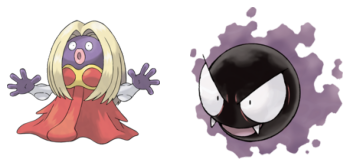

- 번호를 입력해 주세요: 2

128강 2/64: 3. 뮤 vs 4. 도나리


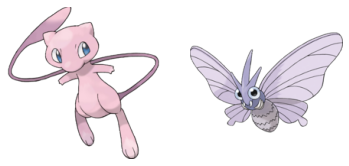

- 번호를 입력해 주세요: 3

128강 3/64: 5. 이상해씨 vs 6. 닥트리오


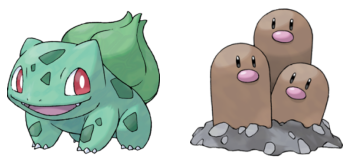

- 번호를 입력해 주세요: 5

128강 4/64: 7. 뚜벅쵸 vs 8. 후딘


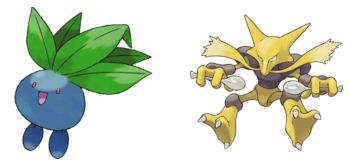

- 번호를 입력해 주세요: 7

128강 5/64: 9. 독파리 vs 10. 별가사리


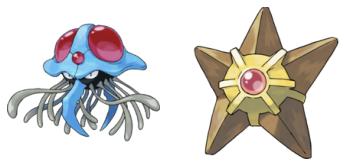

- 번호를 입력해 주세요: 9

128강 6/64: 11. 피츄 vs 12. 미뇽


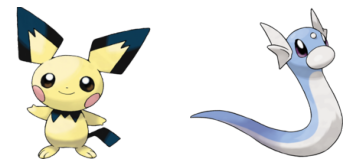

- 번호를 입력해 주세요: 11

128강 7/64: 13. 근육몬 vs 14. 니드리노


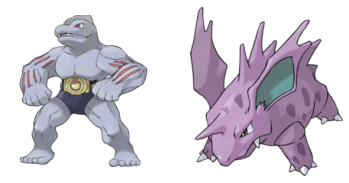

- 번호를 입력해 주세요: 13

128강 8/64: 15. 질퍽이 vs 16. 홍수몬


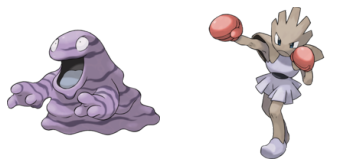

- 번호를 입력해 주세요: 15

128강 9/64: 17. 슈륙챙이 vs 18. 삐


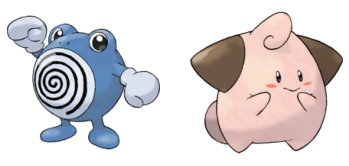

- 번호를 입력해 주세요: 18

128강 10/64: 19. 토게틱 vs 20. 니드런♀


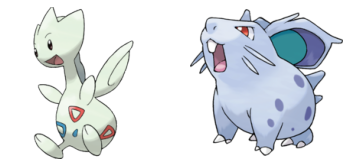

- 번호를 입력해 주세요: 19

128강 11/64: 21. 브케인 vs 22. 파오리


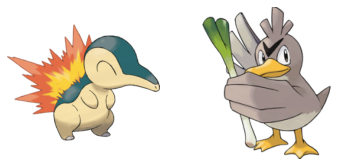

- 번호를 입력해 주세요: 22

128강 12/64: 23. 우츠동 vs 24. 우츠보트


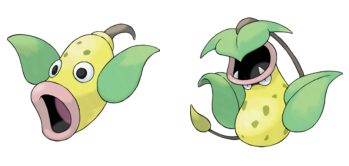

- 번호를 입력해 주세요: 23

128강 13/64: 25. 코일 vs 26. 나시


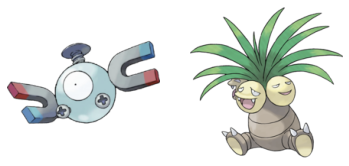

- 번호를 입력해 주세요: 26

128강 14/64: 27. 리자몽 vs 28. 잉어킹


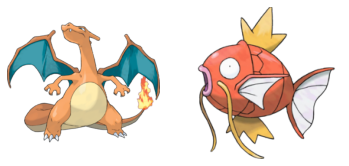

- 번호를 입력해 주세요: 27

128강 15/64: 29. 푸푸린 vs 30. 니드리나


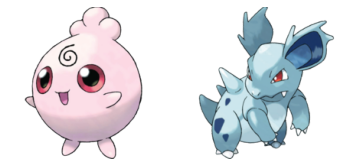

- 번호를 입력해 주세요: 29

128강 16/64: 31. 거북왕 vs 32. 메타몽


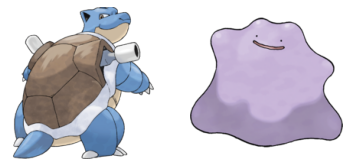

- 번호를 입력해 주세요: 32

128강 17/64: 33. 파이리 vs 34. 아보


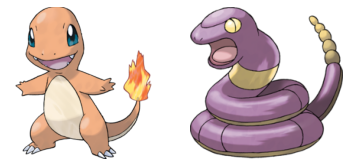

- 번호를 입력해 주세요: 33

128강 18/64: 35. 냄새꼬 vs 36. 피카츄


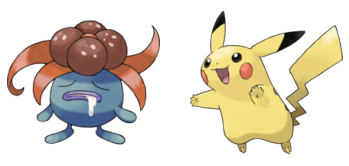

- 번호를 입력해 주세요: 36

128강 19/64: 37. 따라큐 vs 38. 야돈


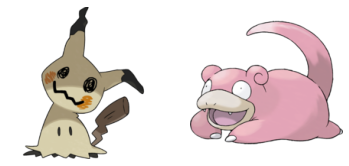

- 번호를 입력해 주세요: 37

128강 20/64: 39. 쥬피썬더 vs 40. 꼬렛


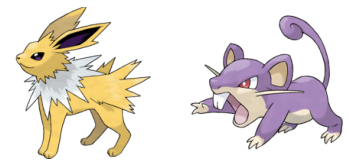

- 번호를 입력해 주세요: 39

128강 21/64: 41. 내루미 vs 42. 텅구리


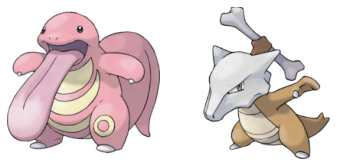

- 번호를 입력해 주세요: 41

128강 22/64: 43. 콘치 vs 44. 망나뇽


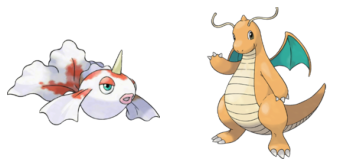

- 번호를 입력해 주세요: 44

128강 23/64: 45. 탕구리 vs 46. 님피아


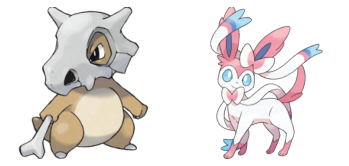

- 번호를 입력해 주세요: 45

128강 24/64: 47. 고라파덕 vs 48. 또도가스


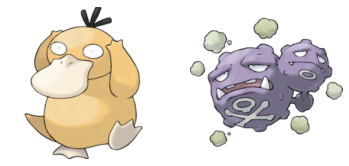

- 번호를 입력해 주세요: 47

128강 25/64: 49. 고우스트 vs 50. 암나이트


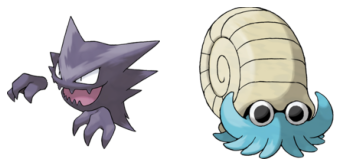

- 번호를 입력해 주세요: 49

128강 26/64: 51. 픽시 vs 52. 날쌩마


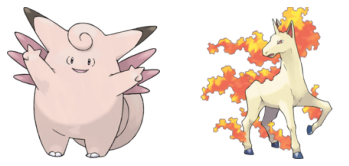

- 번호를 입력해 주세요: 51

128강 27/64: 53. 골뱃 vs 54. 식스테일


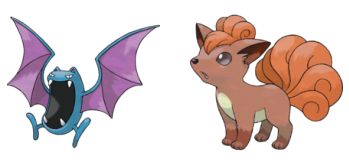

- 번호를 입력해 주세요: 54

128강 28/64: 55. 두두 vs 56. 베이리프


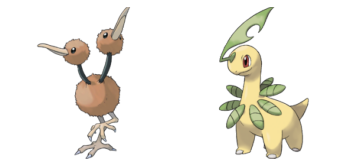

- 번호를 입력해 주세요: 55

128강 29/64: 57. 푸린 vs 58. 아라리


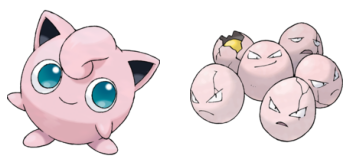

- 번호를 입력해 주세요: 57

128강 30/64: 59. 팽도리 vs 60. 썬더


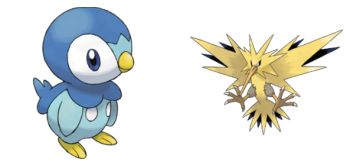

- 번호를 입력해 주세요: 59

128강 31/64: 61. 럭키 vs 62. 에브이


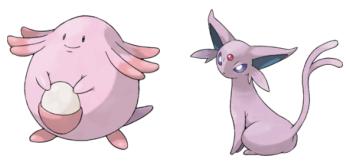

- 번호를 입력해 주세요: 62

128강 32/64: 63. 디그다 vs 64. 알통몬


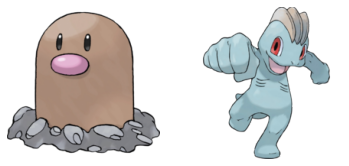

- 번호를 입력해 주세요: 63

128강 33/64: 65. 골덕 vs 66. 가디


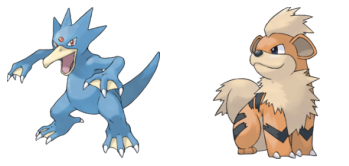

- 번호를 입력해 주세요: 66

128강 34/64: 67. 롱스톤 vs 68. 리자드


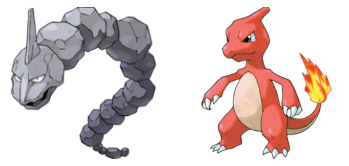

- 번호를 입력해 주세요: 67

128강 35/64: 69. 갸라도스 vs 70. 블래키


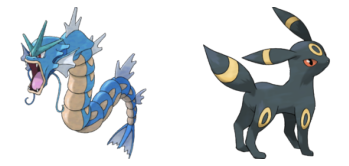

- 번호를 입력해 주세요: 70

128강 36/64: 71. 피죤투 vs 72. 모래두지


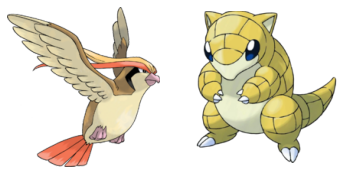

- 번호를 입력해 주세요: 71

128강 37/64: 73. 꼬부기 vs 74. 라이츄


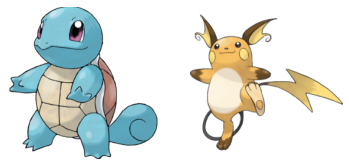

- 번호를 입력해 주세요: 73

128강 38/64: 75. 치코리타 vs 76. 킹드라


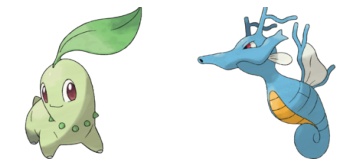

- 번호를 입력해 주세요: 75

128강 39/64: 77. 크랩 vs 78. 시라소몬


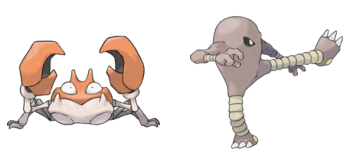

- 번호를 입력해 주세요: 77

128강 40/64: 79. 푸크린 vs 80. 피죤


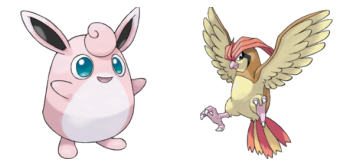

- 번호를 입력해 주세요: 79

128강 41/64: 81. 야도란 vs 82. 아쿠스타


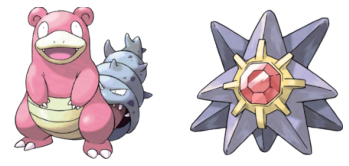

- 번호를 입력해 주세요: 91
숫자를 잘못 입력했습니다. 다시입력해 주세요.
- 번호를 입력해 주세요: 81

128강 42/64: 83. 레어코일 vs 84. 셀러


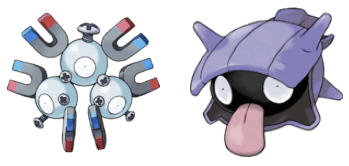

- 번호를 입력해 주세요: 84

128강 43/64: 85. 캐이시 vs 86. 니드런♂


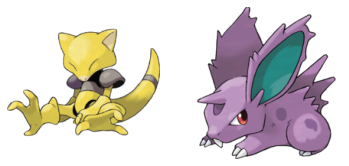

- 번호를 입력해 주세요: 86

128강 44/64: 87. 콘팡 vs 88. 꼬마돌


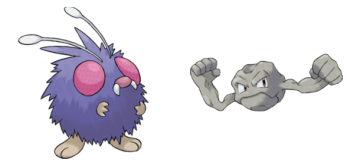

- 번호를 입력해 주세요: 87

128강 45/64: 89. 라플레시아 vs 90. 니드퀸


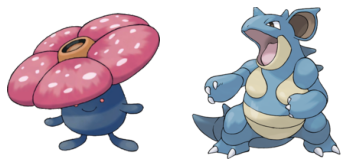

- 번호를 입력해 주세요: 88
숫자를 잘못 입력했습니다. 다시입력해 주세요.
- 번호를 입력해 주세요: 89

128강 46/64: 91. 나옹 vs 92. 뮤츠


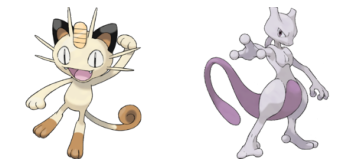

- 번호를 입력해 주세요: 91

128강 47/64: 93. 쏘드라 vs 94. 킹크랩


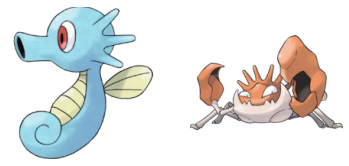

- 번호를 입력해 주세요: 93

128강 48/64: 95. 잠만보 vs 96. 발챙이


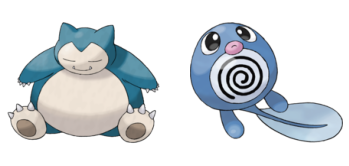

- 번호를 입력해 주세요: 95

128강 49/64: 97. 버터플 vs 98. 포니타


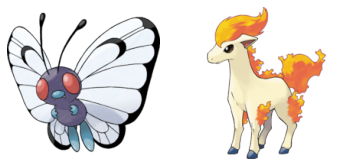

- 번호를 입력해 주세요: 98

128강 50/64: 99. 왕콘치 vs 100. 리아코


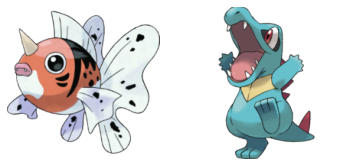

- 번호를 입력해 주세요: 100

128강 51/64: 101. 찌리리공 vs 102. 니드킹


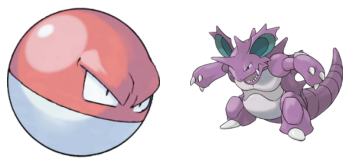

- 번호를 입력해 주세요: 101

128강 52/64: 103. 이상해꽃 vs 104. 모다피


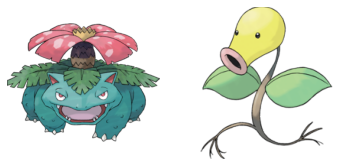

- 번호를 입력해 주세요: 103

128강 53/64: 105. 리피아 vs 106. 토게피


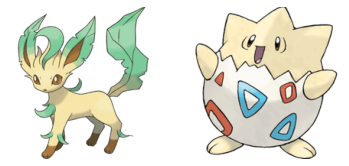

- 번호를 입력해 주세요: 106

128강 54/64: 107. 뿔충이 vs 108. 나인테일


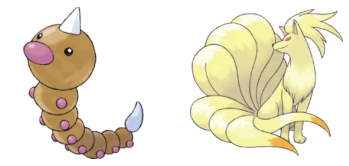

- 번호를 입력해 주세요: 108

128강 55/64: 109. 단데기 vs 110. 페르시온


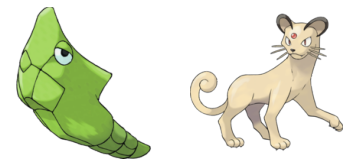

- 번호를 입력해 주세요: 110

128강 56/64: 111. 삐삐 vs 112. 라프라스


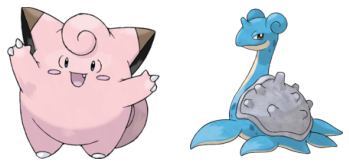

- 번호를 입력해 주세요: 111

128강 57/64: 113. 부스터 vs 114. 이브이


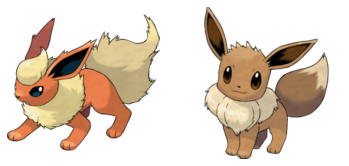

- 번호를 입력해 주세요: 114

128강 58/64: 115. 캐터피 vs 116. 샤미드


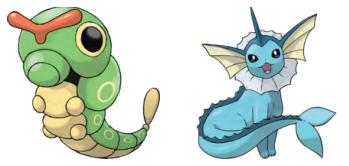

- 번호를 입력해 주세요: 116

128강 59/64: 117. 스라크 vs 118. 캥카


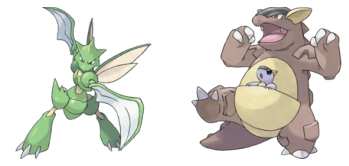

- 번호를 입력해 주세요: 117

128강 60/64: 119. 망키 vs 120. 슬리프


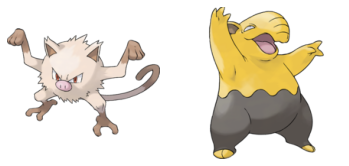

- 번호를 입력해 주세요: 119

128강 61/64: 121. 신뇽 vs 122. 이상해풀


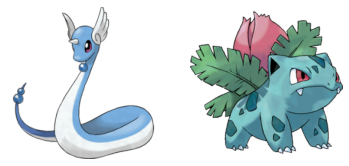

- 번호를 입력해 주세요: 122

128강 62/64: 123. 구구 vs 124. 시드라


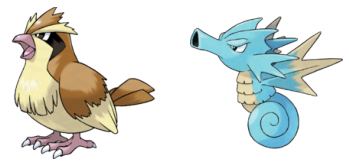

- 번호를 입력해 주세요: 124

128강 63/64: 125. 또가스 vs 126. 슬리퍼


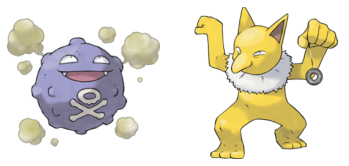

- 번호를 입력해 주세요: 125

128강 64/64: 127. 딱충이 vs 128. 폴리곤


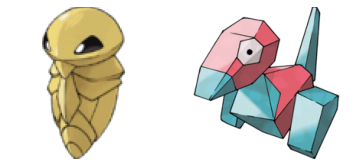

- 번호를 입력해 주세요: 128

===================[64강 시작]===================

64강 1/32: 1. 내루미 vs 2. 팽도리


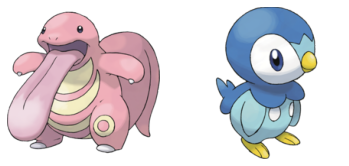

- 번호를 입력해 주세요: 2

64강 2/32: 3. 픽시 vs 4. 뚜벅쵸


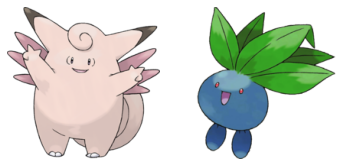

- 번호를 입력해 주세요: 4

64강 3/32: 5. 피츄 vs 6. 고우스트


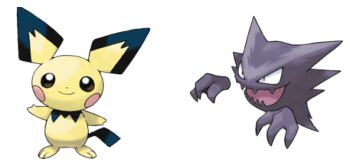

- 번호를 입력해 주세요: 5

64강 4/32: 7. 근육몬 vs 8. 스라크


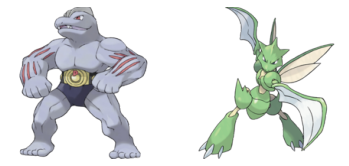

- 번호를 입력해 주세요: 7

64강 5/32: 9. 푸푸린 vs 10. 라플레시아


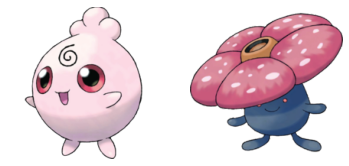

- 번호를 입력해 주세요: 9

64강 6/32: 11. 따라큐 vs 12. 뮤


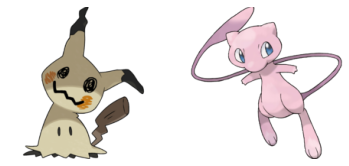

- 번호를 입력해 주세요: 11

64강 7/32: 13. 식스테일 vs 14. 이브이


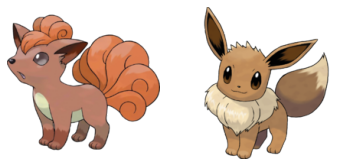

- 번호를 입력해 주세요: 14

64강 8/32: 15. 우츠동 vs 16. 두두


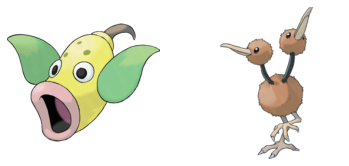

- 번호를 입력해 주세요: 16

64강 9/32: 17. 시드라 vs 18. 독파리


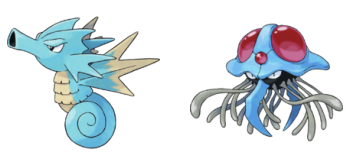

- 번호를 입력해 주세요: 17

64강 10/32: 19. 나시 vs 20. 블래키


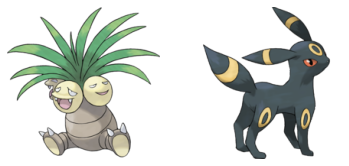

- 번호를 입력해 주세요: 20

64강 11/32: 21. 포니타 vs 22. 쥬피썬더


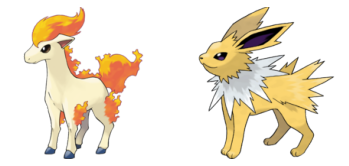

- 번호를 입력해 주세요: 22

64강 12/32: 23. 토게틱 vs 24. 파이리


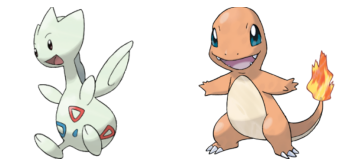

- 번호를 입력해 주세요: 24

64강 13/32: 25. 가디 vs 26. 콘팡


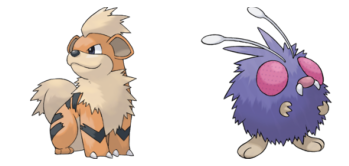

- 번호를 입력해 주세요: 25

64강 14/32: 27. 질퍽이 vs 28. 리자몽


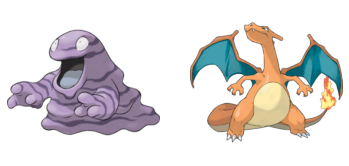

- 번호를 입력해 주세요: 28

64강 15/32: 29. 디그다 vs 30. 리아코


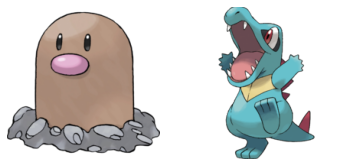

- 번호를 입력해 주세요: 30

64강 16/32: 31. 페르시온 vs 32. 이상해꽃


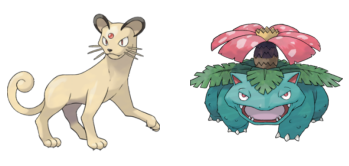

- 번호를 입력해 주세요: 32

64강 17/32: 33. 고라파덕 vs 34. 이상해풀


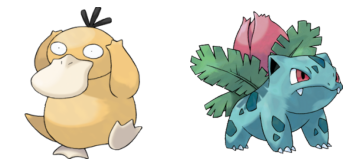

- 번호를 입력해 주세요: 34

64강 18/32: 35. 탕구리 vs 36. 또가스


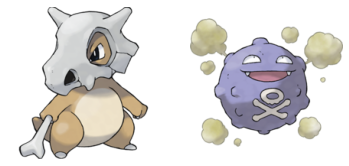

- 번호를 입력해 주세요: 35

64강 19/32: 37. 폴리곤 vs 38. 피카츄


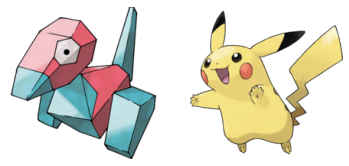

- 번호를 입력해 주세요: 38

64강 20/32: 39. 메타몽 vs 40. 삐삐


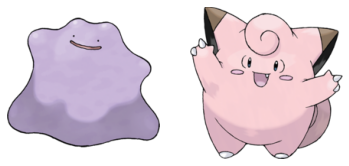

- 번호를 입력해 주세요: 39

64강 21/32: 41. 이상해씨 vs 42. 쏘드라


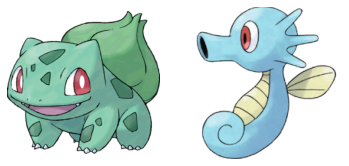

- 번호를 입력해 주세요: 41

64강 22/32: 43. 나옹 vs 44. 삐


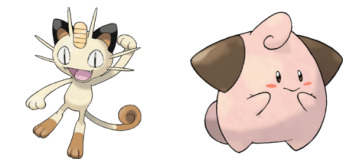

- 번호를 입력해 주세요: 43

64강 23/32: 45. 꼬부기 vs 46. 찌리리공


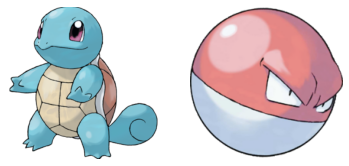

- 번호를 입력해 주세요: 45

64강 24/32: 47. 니드런♂ vs 48. 잠만보


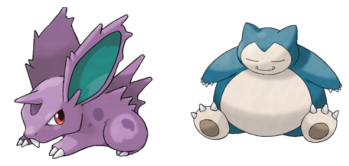

- 번호를 입력해 주세요: 48

64강 25/32: 49. 고오스 vs 50. 샤미드


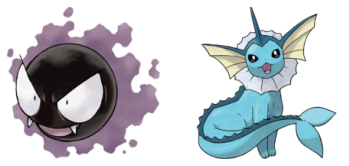

- 번호를 입력해 주세요: 50

64강 26/32: 51. 치코리타 vs 52. 푸크린


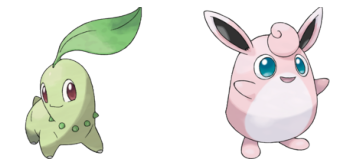

- 번호를 입력해 주세요: 52

64강 27/32: 53. 망키 vs 54. 푸린


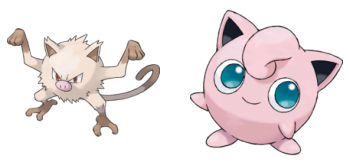

- 번호를 입력해 주세요: 54

64강 28/32: 55. 망나뇽 vs 56. 토게피


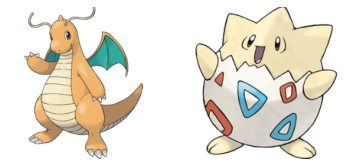

- 번호를 입력해 주세요: 56

64강 29/32: 57. 크랩 vs 58. 나인테일


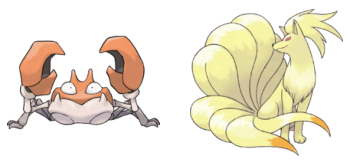

- 번호를 입력해 주세요: 58

64강 30/32: 59. 야도란 vs 60. 파오리


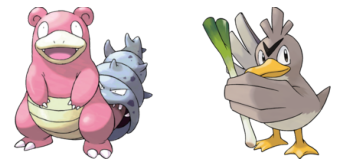

- 번호를 입력해 주세요: 60

64강 31/32: 61. 에브이 vs 62. 롱스톤


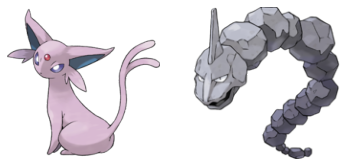

- 번호를 입력해 주세요: 62

64강 32/32: 63. 셀러 vs 64. 피죤투


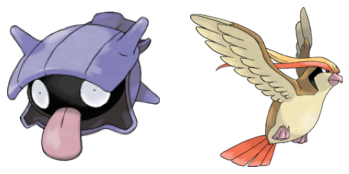

- 번호를 입력해 주세요: 63

===================[32강 시작]===================

32강 1/16: 1. 근육몬 vs 2. 나옹


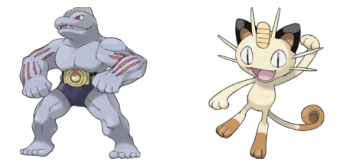

- 번호를 입력해 주세요: 2

32강 2/16: 3. 토게피 vs 4. 셀러


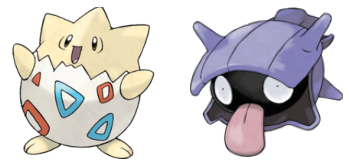

- 번호를 입력해 주세요: 3

32강 3/16: 5. 시드라 vs 6. 파오리


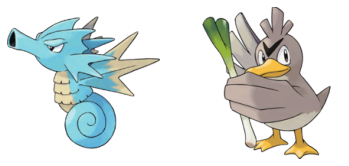

- 번호를 입력해 주세요: 6

32강 4/16: 7. 뚜벅쵸 vs 8. 꼬부기


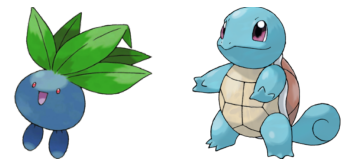

- 번호를 입력해 주세요: 8

32강 5/16: 9. 두두 vs 10. 블래키


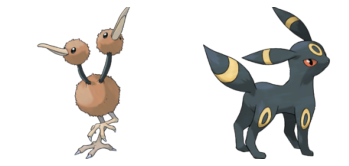

- 번호를 입력해 주세요: 10

32강 6/16: 11. 롱스톤 vs 12. 이상해씨


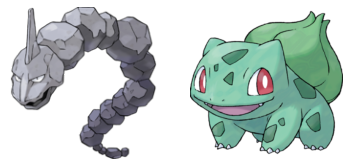

- 번호를 입력해 주세요: 12

32강 7/16: 13. 메타몽 vs 14. 푸크린


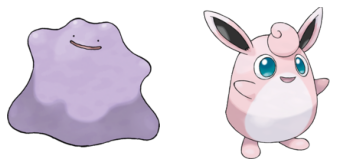

- 번호를 입력해 주세요: 13

32강 8/16: 15. 리자몽 vs 16. 이상해꽃


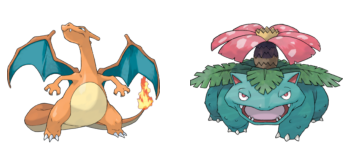

- 번호를 입력해 주세요: 15

32강 9/16: 17. 리아코 vs 18. 피카츄


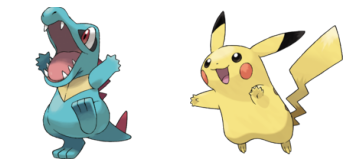

- 번호를 입력해 주세요: 18

32강 10/16: 19. 쥬피썬더 vs 20. 파이리


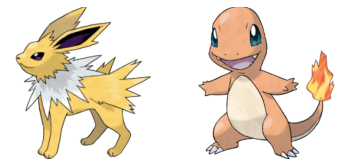

- 번호를 입력해 주세요: 20

32강 11/16: 21. 가디 vs 22. 따라큐


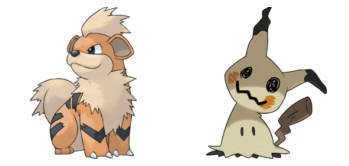

- 번호를 입력해 주세요: 21

32강 12/16: 23. 이상해풀 vs 24. 피츄


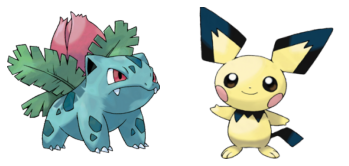

- 번호를 입력해 주세요: 24

32강 13/16: 25. 푸린 vs 26. 나인테일


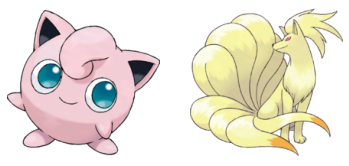

- 번호를 입력해 주세요: 25

32강 14/16: 27. 팽도리 vs 28. 잠만보


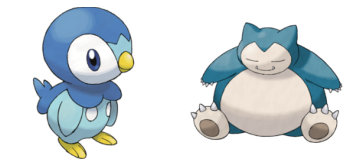

- 번호를 입력해 주세요: 28

32강 15/16: 29. 푸푸린 vs 30. 샤미드


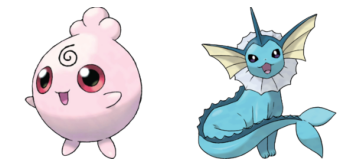

- 번호를 입력해 주세요: 29

32강 16/16: 31. 탕구리 vs 32. 이브이


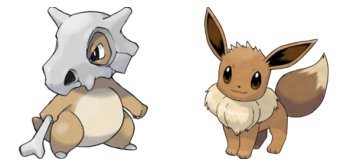

- 번호를 입력해 주세요: 32

===================[16강 시작]===================

16강 1/8: 1. 토게피 vs 2. 이브이


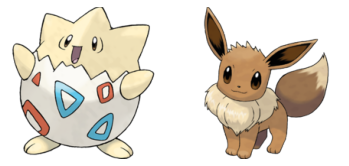

- 번호를 입력해 주세요: 2

16강 2/8: 3. 나옹 vs 4. 메타몽


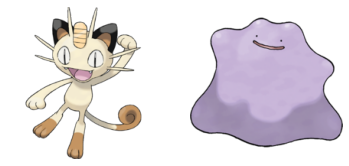

- 번호를 입력해 주세요: 4

16강 3/8: 5. 꼬부기 vs 6. 리자몽


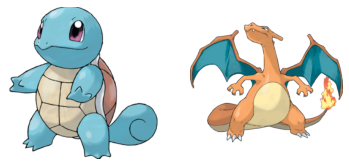

- 번호를 입력해 주세요: 5

16강 4/8: 7. 파오리 vs 8. 푸푸린


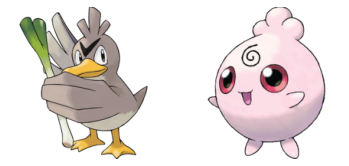

- 번호를 입력해 주세요: 8

16강 5/8: 9. 피츄 vs 10. 푸린


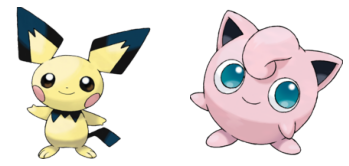

- 번호를 입력해 주세요: 9

16강 6/8: 11. 파이리 vs 12. 이상해씨


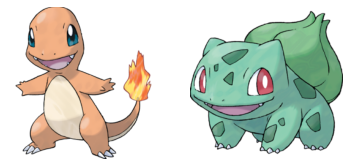

- 번호를 입력해 주세요: 12

16강 7/8: 13. 피카츄 vs 14. 블래키


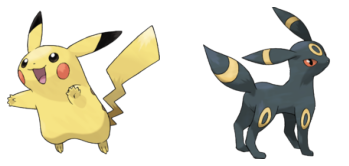

- 번호를 입력해 주세요: 13

16강 8/8: 15. 잠만보 vs 16. 가디


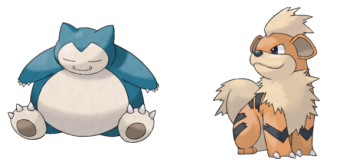

- 번호를 입력해 주세요: 15

===================[8강 시작]===================

8강 1/4: 1. 이상해씨 vs 2. 잠만보


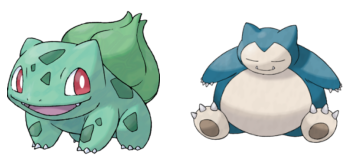

- 번호를 입력해 주세요: 1

8강 2/4: 3. 이브이 vs 4. 피카츄


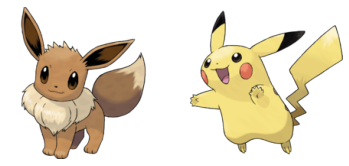

- 번호를 입력해 주세요: 3

8강 3/4: 5. 메타몽 vs 6. 꼬부기


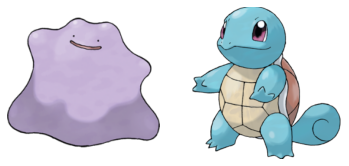

- 번호를 입력해 주세요: 5

8강 4/4: 7. 피츄 vs 8. 푸푸린


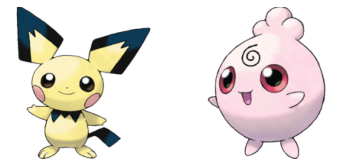

- 번호를 입력해 주세요: 7

===================[4강 시작]===================

4강 1/2: 1. 이상해씨 vs 2. 이브이


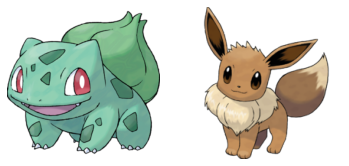

- 번호를 입력해 주세요: 1

4강 2/2: 3. 피츄 vs 4. 메타몽


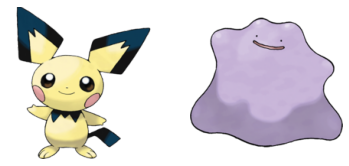

- 번호를 입력해 주세요: 3

=================[결승전 시작]=================

2강 1/1: 1. 이상해씨 vs 2. 피츄


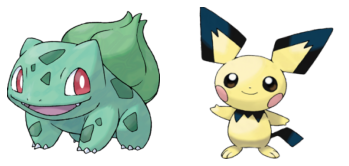

- 번호를 입력해 주세요: 2

================★[최종 결과]★================
1위:  피츄


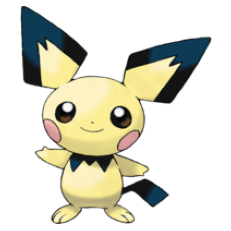

In [2]:
a=WorldCup()
a.start_game()